Simulating real-time-like ECG filtering...


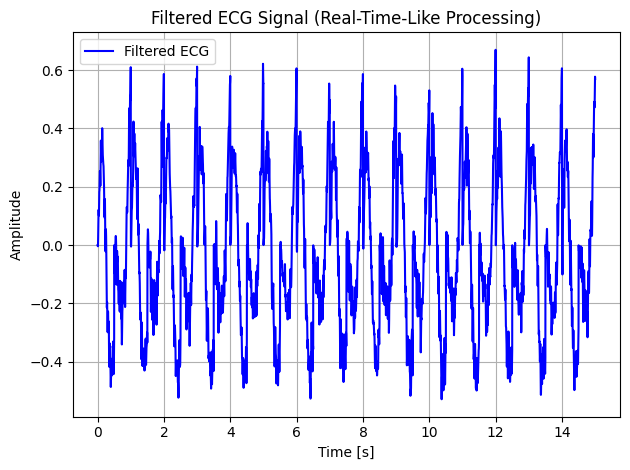

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import butter, lfilter

# --- 1. Generate synthetic ECG-like signal ---
def synthetic_ecg(fs, duration, heart_rate=60):
    t = np.linspace(0, duration, int(fs * duration))
    ecg = 0.6 * np.sin(2 * np.pi * heart_rate / 60 * t) \
        + 0.2 * np.sin(2 * np.pi * 2 * heart_rate / 60 * t) \
        + 0.1 * np.random.randn(len(t))  # Add noise
    return t, ecg

# --- 2. Bandpass filter (0.5 - 40 Hz) ---
def bandpass_filter(signal, fs, lowcut=0.5, highcut=40.0, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

# --- 3. Simulate real-time-like processing ---
def simulate_real_time_processing(ecg_signal, fs, block_size=200):
    total_samples = len(ecg_signal)
    num_blocks = total_samples // block_size
    delay = block_size / fs  # Simulate time delay per block
    processed_signal = []
    t_axis = []

    print("Simulating real-time-like ECG filtering...")

    for i in range(num_blocks):
        block = ecg_signal[i * block_size: (i + 1) * block_size]
        filtered = bandpass_filter(block, fs)
        processed_signal.extend(filtered)
        t_axis.extend(np.arange(i * block_size, (i + 1) * block_size) / fs)

        # Simulate real-time delay (no dynamic plotting)
        time.sleep(delay)

    # One final plot after all blocks are processed
    plt.figure()
    plt.plot(t_axis, processed_signal, label="Filtered ECG", color='blue')
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title("Filtered ECG Signal (Real-Time-Like Processing)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Run simulation ---
fs = 400        # Sampling frequency (Hz)
duration = 15   # Duration in seconds
block_size = 200  # Block size in samples

t, ecg = synthetic_ecg(fs, duration)
simulate_real_time_processing(ecg, fs, block_size)
